<a href="https://colab.research.google.com/github/sanaharora/EDATheoryDA/blob/main/DA_TS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# Load the dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bodyPerformance.csv"
df = pd.read_csv(url)

In [4]:
# Create a synthetic time index (e.g., an increasing sequence)
df['time'] = np.arange(len(df))

# Set the 'time' column as the index (for time series-like operations)
df.set_index('time', inplace=True)

# Check for missing values
print(df.isnull().sum())

age                        0
gender                     1
height_cm                  0
weight_kg                  0
body fat_%                 1
diastolic                  0
systolic                   1
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64


In [5]:
# Summary statistics for the dataset
print(df.describe())


                age     height_cm     weight_kg    body fat_%     diastolic  \
count  13393.000000  13393.000000  13393.000000  13392.000000  13393.000000   
mean      36.775106    168.559807     67.447316     23.240258     78.796842   
std       13.625639      8.426583     11.949666      7.257107     10.742033   
min       21.000000    125.000000     26.300000      3.000000      0.000000   
25%       25.000000    162.400000     58.200000     18.000000     71.000000   
50%       32.000000    169.200000     67.400000     22.800000     79.000000   
75%       48.000000    174.800000     75.300000     28.000000     86.000000   
max       64.000000    193.800000    138.100000     78.400000    156.200000   

           systolic     gripForce  sit and bend forward_cm  sit-ups counts  \
count  13392.000000  13393.000000             13393.000000    13393.000000   
mean     130.233938     36.963877                15.209268       39.771224   
std       14.714152     10.624864                 8.45

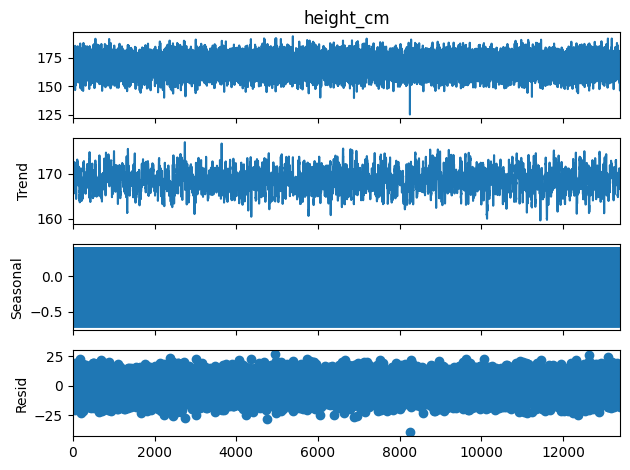

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
# Decompose the 'height_cm' or another numerical column into trend, seasonal, and residual components
decomposition = seasonal_decompose(df['height_cm'], model='additive', period=12)  # Adjust period as needed
decomposition.plot()
plt.show()


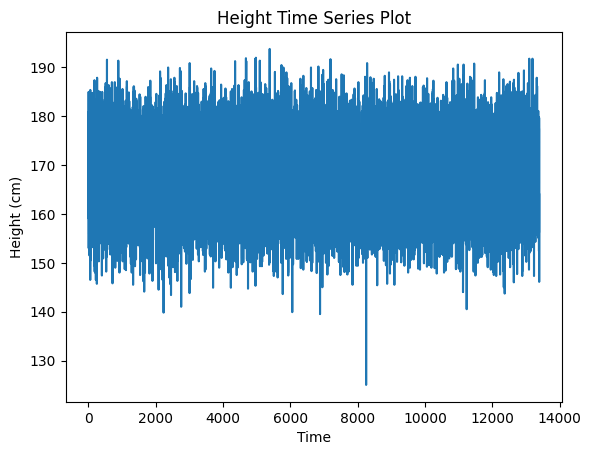

In [8]:
# Plot the time series
df['height_cm'].plot(title='Height Time Series Plot')
plt.xlabel('Time')
plt.ylabel('Height (cm)')
plt.show()


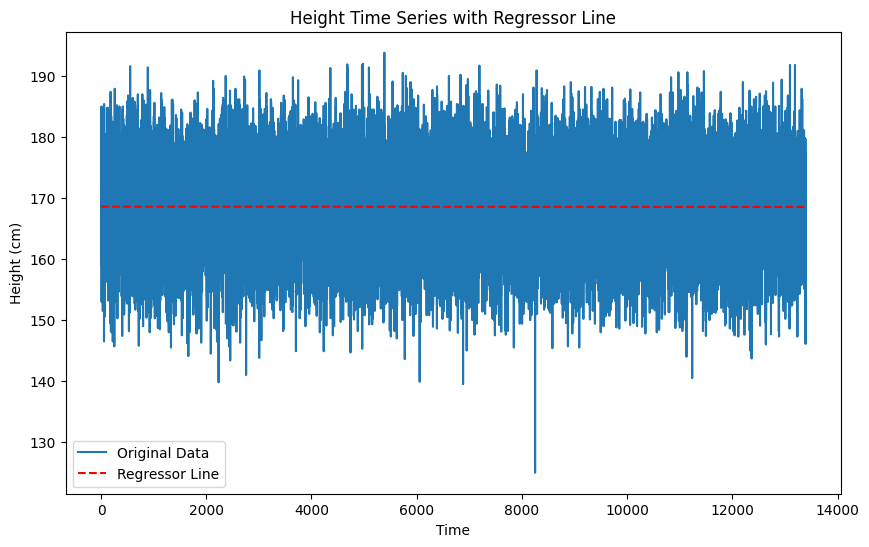

In [9]:
from sklearn.linear_model import LinearRegression

# Fit linear regression model
X = df.index.values.reshape(-1, 1)  # Time as independent variable
y = df['height_cm'].values  # Dependent variable (e.g., height)
model = LinearRegression().fit(X, y)
df['regressor'] = model.predict(X)

# Plot the original time series and the regressor line
plt.figure(figsize=(10, 6))
plt.plot(df['height_cm'], label='Original Data')
plt.plot(df['regressor'], label='Regressor Line', linestyle='--', color='red')
plt.title('Height Time Series with Regressor Line')
plt.xlabel('Time')
plt.ylabel('Height (cm)')
plt.legend()
plt.show()


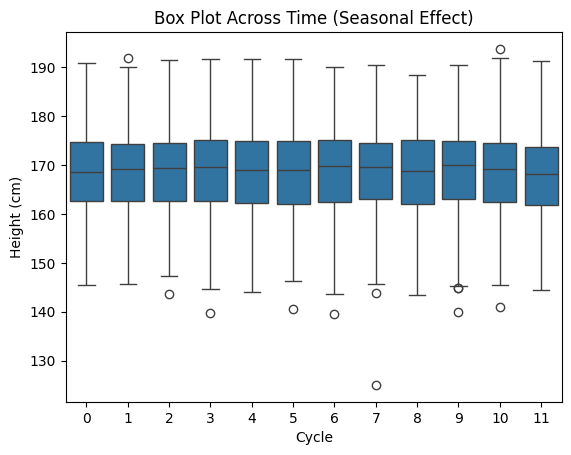

In [10]:
# Plot seasonal effects using boxplot (across the 'cycle')
sns.boxplot(x=df.index % 12, y=df['height_cm'])
plt.title('Box Plot Across Time (Seasonal Effect)')
plt.xlabel('Cycle')
plt.ylabel('Height (cm)')
plt.show()


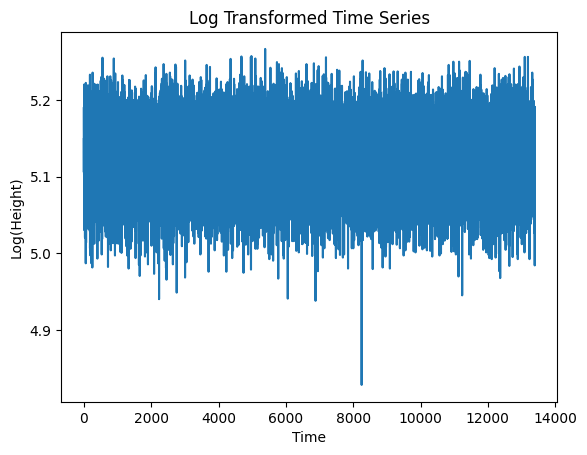

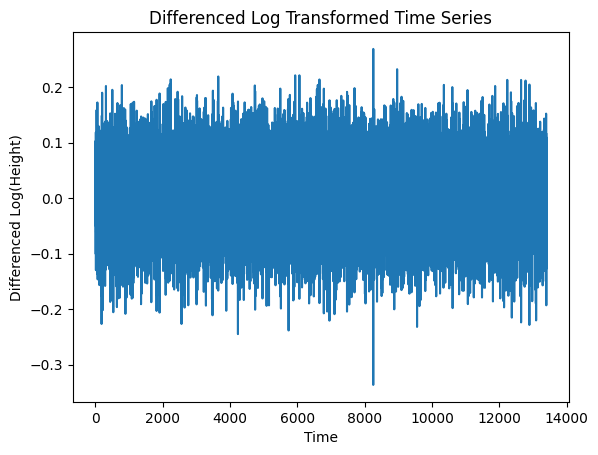

In [11]:
# Log transformation
df['log_height'] = np.log(df['height_cm'])
df['log_height'].plot(title='Log Transformed Time Series')
plt.xlabel('Time')
plt.ylabel('Log(Height)')
plt.show()

# Differencing to make it stationary
df['diff_log_height'] = df['log_height'].diff().dropna()
df['diff_log_height'].plot(title='Differenced Log Transformed Time Series')
plt.xlabel('Time')
plt.ylabel('Differenced Log(Height)')
plt.show()
